In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/houhiroshisakai/Desktop/Schulich/MBAN 6110 S - Data Science I/kc_house_data.csv')

In [3]:
#Check if there is null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
#Drop duplicate numbers if the dataset has.
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
#Drop 'id' column since it is unnecessary to predict
df = df.drop(['id'], axis = 1)
#Convert 'time' column type
df['date'] = pd.to_datetime(df['date'])

In [53]:
#Calculate correlations to identify which variables need to be use to predict the price of house
correlations = df.corr()['price'].abs().sort_values(ascending=False)
#See the order of features which influence the price of house
#Find the features strongly influence the pirice of house (correlations > 0.5)
features = correlations.index.tolist()
top_features = correlations[correlations > 0.5].index.tolist()
print(features)
print('Top list:',top_features)

['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built', 'zipcode', 'condition', 'long', 'date']
Top list: ['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']


In [9]:
results = ols("price ~ sqft_living + grade + sqft_above + sqft_living15 + bathrooms", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     5160.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:37:09   Log-Likelihood:            -2.9911e+05
No. Observations:               21613   AIC:                         5.982e+05
Df Residuals:                   21607   BIC:                         5.983e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.469e+05   1.35e+04    -47.870

In [10]:
#Calculate its MSE value for OLS model:
pred_ols = results.predict(df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']])
print('mse for OLS model is ', mean_squared_error(pred_ols,df['price']))

mse for OLS model is  61428294831.088295


In [11]:
"y_hat = -646900 + 245.4208sqft_living + 111000grade - 80.4847sqft_above + 22.8201sqft_living15 - 35460bathrooms"

'y_hat = -646900 + 245.4208sqft_living + 111000grade - 80.4847sqft_above + 22.8201sqft_living15 - 35460bathrooms'

In [12]:
#Predict results of price with these main features
pred_vals = results.predict(df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']])

In [13]:
pred_vals

0        320050.240441
1        545162.349954
2        172893.231989
3        451469.840738
4        488576.450771
             ...      
21608    439942.593109
21609    575438.810662
21610    295224.033751
21611    448749.711721
21612    295224.033751
Length: 21613, dtype: float64

In [14]:
#Residuals
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)

In [15]:
res

,y_hat,price
0,320050.240441,221900.0
1,545162.349954,538000.0
2,172893.231989,180000.0
3,451469.840738,604000.0
4,488576.450771,510000.0
...,...,...
21608,439942.593109,360000.0
21609,575438.810662,400000.0
21610,295224.033751,402101.0
21611,448749.711721,400000.0


In [16]:
#Looking for the difference between the predicted value and the actual value
res['error'] = res['y_hat'] - res['price']

In [17]:
res.head(1)

,y_hat,price,error
0,320050.240441,221900.0,98150.240441


In [18]:
#Calculate r^2 (coefficient)
res['sq_error'] = res['error']**2

In [55]:
#print out OLS model's mse
mse = res['sq_error'].mean()
mse

61428294831.088295

In [21]:
#Create and split the categorical & numerical features
categorical_features = ['grade','bathrooms']
numerical_features = ['sqft_living','sqft_above','sqft_living15']
target = ['price']

In [22]:
#Setting train and test value for prediction model
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df['price'],
                                                    test_size = 0.3, random_state=1234)

In [23]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [24]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [25]:
#Using LASSO model to predict
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [26]:
lasso_regression.fit(X_train, y_train)

/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163894328617276.97, tolerance: 207065660607.36664
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'bathrooms']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'sqft_above',
                                                   'sqft_living15'])])),
                ('regressor', Lasso())])

In [27]:
lasso_pred = lasso_regression.predict(X_test)

In [57]:
print('mse for LASSO model is', np.sqrt(mean_squared_error(lasso_pred, y_test)))

mse for LASSO model is 232037.97865667983


In [29]:
#Using Ridge model to predict
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [66]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'bathrooms']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'sqft_above',
                                                   'sqft_living15'])])),
                ('regressor', Ridge(alpha=3.0))])

In [67]:
pred_ridge = ridge_regression.predict(X_test)

In [56]:
print('mse for Ridge model is', np.sqrt(mean_squared_error(pred_ridge,y_test)))

mse for Ridge model is 230026.41920808348


In [91]:
ridge_pred = pd.concat([pd.DataFrame(pred_ridge).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)

In [92]:
ridge_pred['res'] = ridge_pred['pred'] - ridge_pred['price']

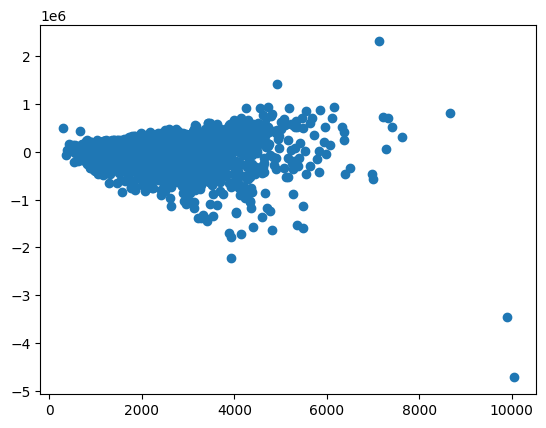

In [93]:
plt.scatter(X_test['sqft_living'],ridge_pred['res'])

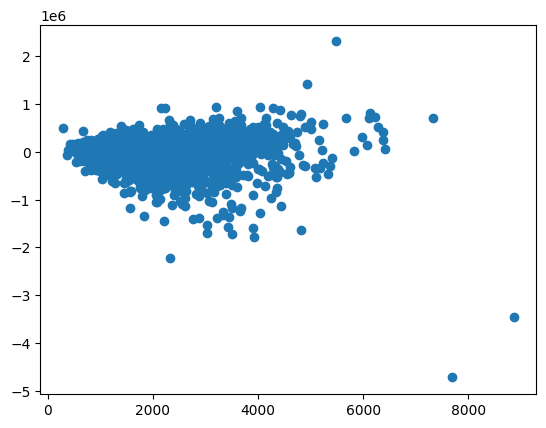

In [94]:
plt.scatter(X_test['sqft_above'],ridge_pred['res'])

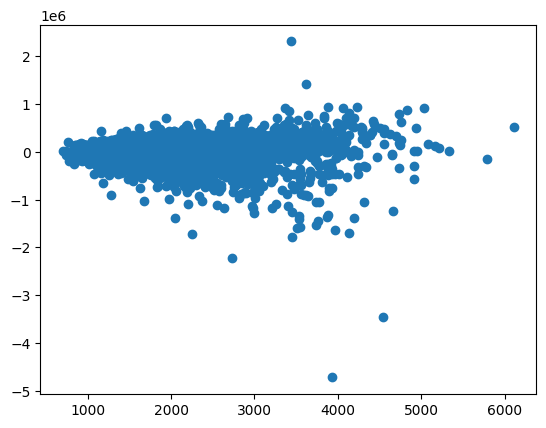

In [95]:
plt.scatter(X_test['sqft_living15'],ridge_pred['res'])

((array([-3.70213724, -3.47078436, -3.34347054, ...,  3.34347054,
          3.47078436,  3.70213724]),
  array([-4716800.30973475, -3444012.05584233, -2230654.47669714, ...,
           941850.98601524,  1411547.24255881,  2302376.89672763])),
 (208569.7633980423, 417.45034264153094, 0.9062432569990673))

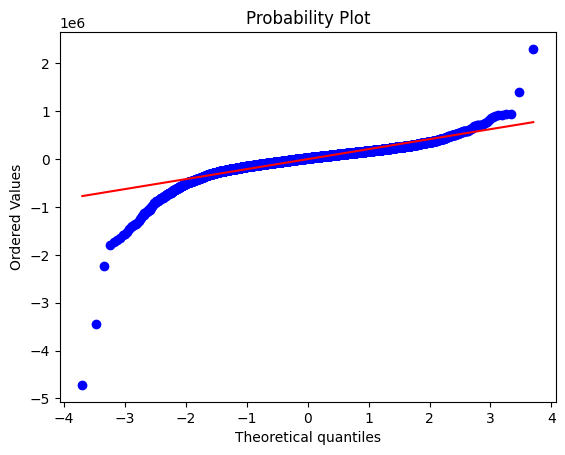

In [97]:
#Build Q-Q plot
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(ridge_pred['res'], dist='norm', plot=ax)

In [102]:
model_dummy = sm.OLS(ridge_pred['res'], sm.add_constant(ridge_pred['pred']))
results_dummy = model_dummy.fit()

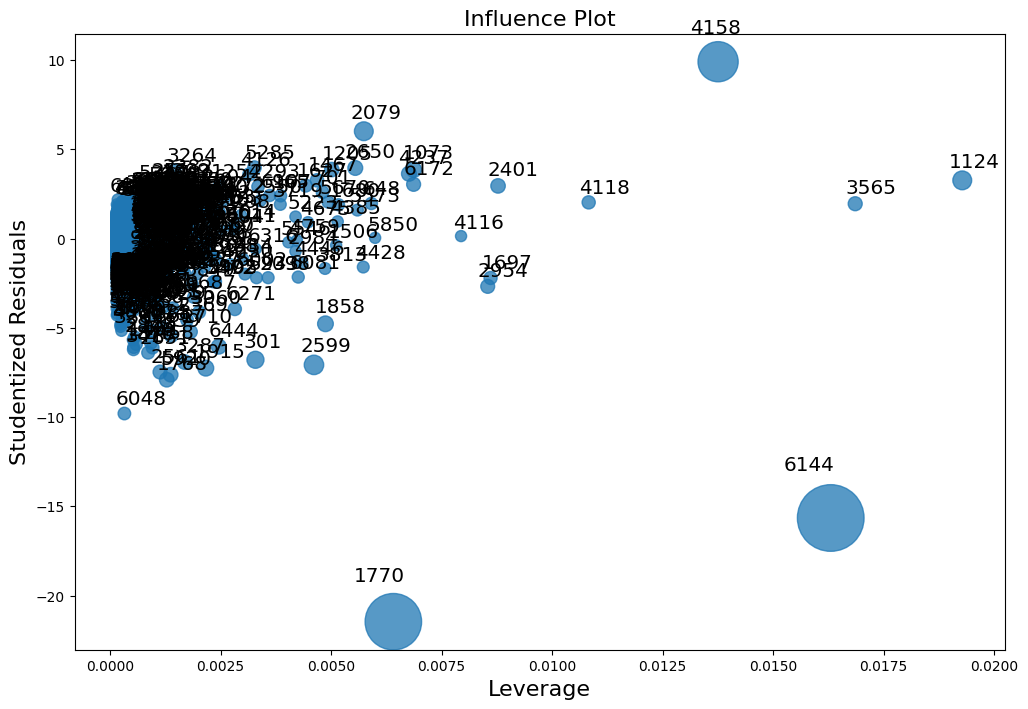

In [103]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.influence_plot(results_dummy, ax=ax, criterion='cooks')
plt.show()

In [36]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [37]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'bathrooms']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'sqft_above',
                                                   'sqft_living15'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [38]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [58]:
print('mse for Elastic Net model is', np.sqrt(mean_squared_error(elasticnet_pred, y_test)))

mse for Elastic Net model is 252412.5672398861


In [40]:
df1 = df.drop(['date'], axis = 1)

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
df_std = scaler.fit_transform(df1)

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df1.columns))])

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [2.98706050e-01 1.27107770e-01 9.71101675e-02 7.25173664e-02
 6.35052253e-02 5.29717864e-02 4.93086988e-02 4.40343935e-02
 3.47733504e-02 3.16396863e-02 2.69960697e-02 2.21205301e-02
 1.74759120e-02 1.54851902e-02 1.39287694e-02 1.24869134e-02
 1.02221929e-02 9.60992764e-03 1.26682684e-31]
Cumulative explained variance ratio: [0.29870605 0.42581382 0.52292399 0.59544135 0.65894658 0.71191837
 0.76122706 0.80526146 0.84003481 0.87167449 0.89867056 0.92079109
 0.93826701 0.9537522  0.96768097 0.98016788 0.99039007 1.
 1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-2.787183,0.093635,-0.312826,0.724492,0.277739,-0.081160,0.647201,-0.085614,-0.338260,1.112971,0.018853,-0.924153,0.108300,0.387203,-0.110722,0.597585,-0.011796,-0.066034,-1.236004e-15
1,-0.115538,1.667041,-0.786663,1.831958,0.952796,4.173660,-0.761665,0.008565,0.386006,-1.027137,0.037381,-0.419011,0.010631,-0.310347,0.149261,-0.423623,0.954386,0.319284,4.130970e-15
2,-2.745091,-0.379096,0.366659,0.397640,0.109069,-0.355148,-1.759604,-1.326540,-0.549129,0.741544,0.007943,0.591860,0.091059,-1.160649,0.989366,-1.156686,-0.365785,0.065158,-1.953241e-14
3,-1.021326,2.083170,0.355177,-1.883953,0.355015,-0.392015,1.150529,1.136832,0.760762,-1.302736,-0.325364,-0.468286,0.488518,0.559037,-0.467881,-0.366072,-0.490206,0.196166,1.590408e-13
4,-0.354374,-1.010422,-0.195211,0.106185,-0.061725,-0.234612,-0.768868,-1.033637,-0.014082,0.303775,0.049580,-0.550829,0.365884,0.745584,-0.423248,0.248519,-0.208347,-0.232874,-2.353637e-15


In [42]:
#Reduce to 90% PC to narrow down those features
# Perform PCA
pca = PCA(n_components = 0.90)
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca)

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [0.29870605 0.12710777 0.09711017 0.07251737 0.06350523 0.05297179
 0.0493087  0.04403439 0.03477335 0.03163969 0.02699607 0.02212053]
Cumulative explained variance ratio: [0.29870605 0.42581382 0.52292399 0.59544135 0.65894658 0.71191837
 0.76122706 0.80526146 0.84003481 0.87167449 0.89867056 0.92079109]


,0,1,2,3,4,5,6,7,8,9,10,11
0,-2.787183,0.093635,-0.312826,0.724492,0.277739,-0.081160,0.647201,-0.085614,-0.338260,1.112971,0.018853,-0.924153
1,-0.115538,1.667041,-0.786663,1.831958,0.952796,4.173660,-0.761665,0.008565,0.386006,-1.027137,0.037381,-0.419011
2,-2.745091,-0.379096,0.366659,0.397640,0.109069,-0.355148,-1.759604,-1.326540,-0.549129,0.741544,0.007943,0.591860
3,-1.021326,2.083170,0.355177,-1.883953,0.355015,-0.392015,1.150529,1.136832,0.760762,-1.302736,-0.325364,-0.468286
4,-0.354374,-1.010422,-0.195211,0.106185,-0.061725,-0.234612,-0.768868,-1.033637,-0.014082,0.303775,0.049580,-0.550829


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [44]:
x1 = df1
y1 = df['price'] 

In [45]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x1)

In [46]:
pca = PCA(n_components=0.9)
x_pca = pca.fit_transform(x_scaled)

In [47]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y1, test_size=0.3, random_state=1234)

In [48]:
model = LogisticRegression()
model.fit(x_train_pca, y_train)

/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
y_pred_pca = model.predict(x_test_pca)

In [50]:
mse = mean_squared_error(y_test, y_pred_pca)
print("MSE", mse)

MSE 36057459758.78393


Question 1:
After data cleaning, I considered which features are influenced the price of house significantly; therefore, I extracted two variables (sqft_living & grade) by getting correlation. Using these two varibales to predict with OLS model.
Based on building pipeline to run for the training data, LASSO, Ridge, and Elastic Net model have been created for identifying which methods is the best to predict. 

According to the results of each r-squared and MSE values, OLS
Question 2:
According to 